In [52]:
from keras import layers
from keras import models
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import InceptionV3
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras import optimizers, regularizers

In [53]:
RESOLUTION = 150
BATCH_SIZE = 128

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)

train_generator = train_datagen.flow_from_directory(
        '../input/thesimpsonsmaggiedataaugmentation/the-simpsons-dataset-maggie-data-aug/the-simpsons-dataset-maggie-data-aug/',
        target_size=(RESOLUTION, RESOLUTION),
        class_mode='categorical', subset="training")

val_generator = val_datagen.flow_from_directory(
        '../input/thesimpsonsmaggiedataaugmentation/the-simpsons-dataset-maggie-data-aug/the-simpsons-dataset-maggie-data-aug/',
        target_size=(RESOLUTION, RESOLUTION),
        class_mode='categorical', subset="validation")

Found 12289 images belonging to 11 classes.
Found 2162 images belonging to 11 classes.


In [27]:
train_generator.class_indices

{'bart_simpson': 0,
 'charles_montgomery_burns': 1,
 'homer_simpson': 2,
 'krusty_the_clown': 3,
 'lisa_simpson': 4,
 'maggie_simpson': 5,
 'marge_simpson': 6,
 'milhouse_van_houten': 7,
 'moe_szyslak': 8,
 'ned_flanders': 9,
 'principal_skinner': 10}

In [49]:
model = Sequential()
model.add(layers.Conv2D(filters=100, kernel_size=(5, 5), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.Conv2D(filters=100, kernel_size=(5, 5), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=11, activation='softmax'))

In [50]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 146, 146, 100)     7600      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 142, 142, 100)     250100    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 71, 71, 100)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 504100)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                32262464  
_________________________________________________________________
dense_4 (Dense)              (None, 11)                715       
Total params: 32,520,879
Trainable params: 32,520,879
Non-trainable params: 0
________________________________________________________________

In [54]:
N_TRAIN = 12289
N_VAL = 2162

opt = optimizers.RMSprop(lr=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit_generator(
train_generator,
steps_per_epoch=(N_TRAIN // BATCH_SIZE),
epochs=50,
validation_data=val_generator,
validation_steps=(N_VAL // BATCH_SIZE) 
)

Epoch 1/50
96/96 [==============================] - 40s 413ms/step - loss: 14.5755 - acc: 0.0957 - val_loss: 14.7015 - val_acc: 0.0879
Epoch 2/50
96/96 [==============================] - 37s 388ms/step - loss: 14.6228 - acc: 0.0928 - val_loss: 14.5755 - val_acc: 0.0957
Epoch 3/50
96/96 [==============================] - 37s 388ms/step - loss: 14.7802 - acc: 0.0830 - val_loss: 14.6700 - val_acc: 0.0898
Epoch 4/50
96/96 [==============================] - 37s 388ms/step - loss: 14.7329 - acc: 0.0859 - val_loss: 14.7329 - val_acc: 0.0859
Epoch 5/50
96/96 [==============================] - 37s 383ms/step - loss: 14.6646 - acc: 0.0902 - val_loss: 14.7264 - val_acc: 0.0863
Epoch 6/50
96/96 [==============================] - 37s 387ms/step - loss: 14.7329 - acc: 0.0859 - val_loss: 14.8589 - val_acc: 0.0781
Epoch 7/50
96/96 [==============================] - 37s 387ms/step - loss: 14.7382 - acc: 0.0856 - val_loss: 14.4181 - val_acc: 0.1055
Epoch 8/50
96/96 [==============================] - 37s

# Questão 2c.

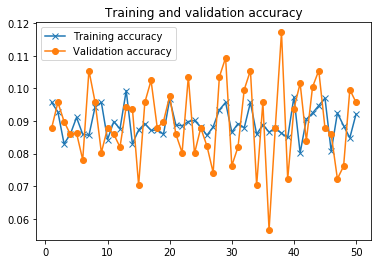

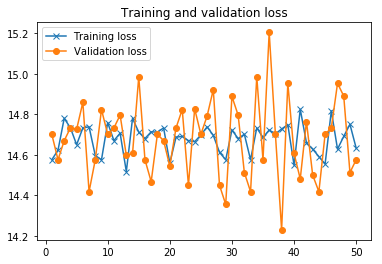

In [55]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training accuracy', marker='x')
plt.plot(epochs, val_acc, label='Validation accuracy', marker='o')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, label='Training loss', marker='x')
plt.plot(epochs, val_loss, label='Validation loss', marker='o')
plt.title('Training and validation loss')
plt.legend()

plt.show()